# Final Project Submission

- Student Name: Deztany Jackson
- Student Pace: Self Pace
- Scheduled Project Review:
- Instructor Name: Morgan Jones
- Blog Post URL:


### Quesitons /Comments
- Aggregate Table for Dataset understanding - mean
- When do we do the TP/FP/TN Stuff?
    - Do cross tab table
- Explore dataset
    - Value Counts: group by Table
    - Graph Prices
    - Historgram of dataset - yes
    - How many of each category is there now....% of dataset
- Look into function of class of cross valudation from workflow model
- How do we get value counts for each column by Catgetory?? EDA
- Plot distribution of the continous numerical values one Way
- Plot categorical numerical values another way?
- Outlier removal How to check?
- Format font and labels in visuals
- Remove warnings from 

## Classification of Paris Housings - Luxury vs Basic

# Business Understanding

Certain Paris Real Estate (RE) investment agencies are looking to invest in luxury properties to lease
out to HotelsVIP Guests of the city and Companies as a "AirBnB" for their employees and clients. There are no rules for foreigners on owning property in France. As one of the  most expensive real estate cities in the world picking prime real estate to buy at the right time is a safe investment.

Classification models will be built to correctly identify "Luxury" property and the best data attributes (features) that help make the best predictions.

It is more important to correctly identify "Luxury" property as best as possible and minimize incorrectly identifying "Basic" property. This will cost having a long list of "Luxury" property but help the RE Investment agencies feel confident in the smaller set of listings.

Due to data imbalance and business goal our main metrics  will be : Precision and F1 

[F1 Score Metric, Joos Kortanje, 2021](https://towardsdatascience.com/the-f1-score-bec2bbc38aa6)

# Data Understanding

### Paris Dataset

This project uses dataset from kaggle and used for Educational Purposes "ParisHousing.csv". The intial dataset starts with 10,000 Rows of data and 18 Features (including "Category" the target value).

[Paris Kaggle Dataset, 2021](https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification)

<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Feature </th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Data Type</th> 
</tr>
</thead>
<tbody>
<td><b>Category</b></td>
<td>Classification of Real Estate<br> (Basic or Luxury)</td>
<td>Nominal Number</td>
</td>
<tr> 
<td><b>Price</b></td>
<td>Cost of RE<br> (Units unknown)</td>
<td>Cardinal Number</td>
</tr>
<tr> 
<td><b>Building_Size(m)</b></td>
<td>Size of the building<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Has_Yard</b></td/>
<td>Has yard <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Has_Pool</b></td>
<td>Has Pool <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_of_Floors</b></td>
<td>Number of Floors</td> (0; 1; 2; 3+)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_of_Rooms</b></td>
<td>Number of Rooms <br> (0; 1; 2; 3+)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>City_Part_Range</b></td>
<td>Thehigher the range, the more exclusive the neighbourhood is<br> </td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>City_Code</b></td>
<td>Zipcode<br> </td>(Number)
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_Previous_Owners</b></td>
<td>Number of Previous Ownder</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Garage_Size(m)</b></td>
<td>Size of the garage<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Attic_Size(m)</b></td>
<td>Size of the attic<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Has_Storm_Protector</b></td>
<td>Has Storm Protector <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Basement_Size(m)</b></td>
<td>Size of the basement<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Year_Built</b></td>
<td>Year built <br></td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_of_Guest_Rooms</b></td>
<td>Number of Guest Rooms <br> (0; 1; 2; 3+)</td>
<td>Cardinal Number</td>
</tr>
<tr>
</tr>
<tr>
<td><b>Has_Storage_Room</b></td>
<td>Has Storage Room <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr> 
</tbody>
</table>

[Loan Classification,Kamal Khumar, 2021 ](https://www.kaggle.com/code/kamalkhumar/loan-status-prediction)

In [1]:
#Import packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,recall_score,accuracy_score, auc
from sklearn.metrics import precision_score, f1_score, confusion_matrix, plot_roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score, make_scorer

import warnings
warnings.filterwarnings('ignore')
#from imblearn.metrics import classification_report_im
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

import pickle

Describe the dataset and where it came from and links [kaggle]

In [2]:
# Import csv file
paris_df = pd.read_csv("data/ParisHousingClass.csv")
paris_df.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price category  
0      4313   9005     956               0             7  7559081.5    Basic  
1      3653   2436     128               1             2  8085989.5   Luxury  
2      2937   8852     135               1             9  5574642.1    Basic  
3       659   7141     359               0             3  3232561.2    Basic  
4      8435   2429     292               1             4  7055052.0   Luxury

This dataset has 10000 rows and 18 columns (including the target)

In [3]:
#Shape of dataset
paris_df.shape

(10000, 18)

In [4]:
#Describe the dataset
paris_df.describe()

squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29006.675799       2.872024       2.856667      9.30809      0.500024   
min        3.000000       1.000000       1.000000   1990.00000      0.000000   
25%    24693.750000       3.000000       3.000000   1997.00000      0.000000   
50%    50693.000000       5.000000       5.000000   2005.50000      0.000000   
75%    75683.250000       8.000000       8.000000   2014.00000      1.000000   
max    99953.000000      10.000000      10.000000   2021.00000      1.000000   

       hasStormProtector      basement        attic       garage  \
count       10000.000000  10000.000000  10000.00000  10000.00000   
mean            0.499900   5033.103900   5028.01060    553.12120   
std             0.500025   2876.729545   2894.33221    262.05017   
min             0.000000      0.000000      1.00000    100.00000   
25%             0.000000   2559.750000   2512.00000    327.75000   
50%             0.000000   5092.500000   5045.00000    554.00000   
75%             1.000000   7511.250000   7540.50000    777.25000   
max             1.000000  10000.000000  10000.00000   1000.00000   

       hasStorageRoom  hasGuestRoom         price  
count    10000.000000   10000.00000  1.000000e+04  
mean         0.503000       4.99460  4.993448e+06  
std          0.500016       3.17641  2.877424e+06  
min          0.000000       0.00000  1.031350e+04  
25%          0.000000       2.00000  2.516402e+06  
50%          1.000000       5.00000  5.016180e+06  
75%          1.000000       8.00000  7.469092e+06  
max          1.000000      10.00000  1.000677e+07

In [5]:
#Information on dataset
paris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

There are no textual values except for the target variable although some are categorical even though they are numerical.

In [6]:
#drop columns that don't seem to add value
paris_df = paris_df.drop(columns="isNewBuilt",axis =1)


In [7]:
#checking shape after deletion
paris_df.shape

(10000, 17)

In [8]:
#Any null values? - No NULL Values
paris_df.isnull().sum()
#No Null values

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [9]:
#Checking for duplicates - None
paris_df.duplicated().sum() 

0

# Describe data Features

- Plot Distribution of data
- Multicolinearity
- Heatmap


In [10]:
#Renaming columns for better clarity
old_cols = []
new_col = ['Building_Size(m)','Num_of_Rooms','Has_Yard','Has_Pool','Num_of_Floors','City_Code','City_Part_Range',
           'Num_Previous_Owners', 'Year_Built','Has_Storm_Protector',
           'Basement_Size(m)','Attic_Size(m)', 'Garage_Size(m)', 'Has_Storage_Room','Num_of_Guest_Rooms','Price','Category']
col_dict = {}
for ind, col in enumerate(paris_df.columns):
    col_dict[col] = new_col[ind]
print(col_dict)
paris_df.rename(columns = col_dict, inplace= True)

{'squareMeters': 'Building_Size(m)', 'numberOfRooms': 'Num_of_Rooms', 'hasYard': 'Has_Yard', 'hasPool': 'Has_Pool', 'floors': 'Num_of_Floors', 'cityCode': 'City_Code', 'cityPartRange': 'City_Part_Range', 'numPrevOwners': 'Num_Previous_Owners', 'made': 'Year_Built', 'hasStormProtector': 'Has_Storm_Protector', 'basement': 'Basement_Size(m)', 'attic': 'Attic_Size(m)', 'garage': 'Garage_Size(m)', 'hasStorageRoom': 'Has_Storage_Room', 'hasGuestRoom': 'Num_of_Guest_Rooms', 'price': 'Price', 'category': 'Category'}


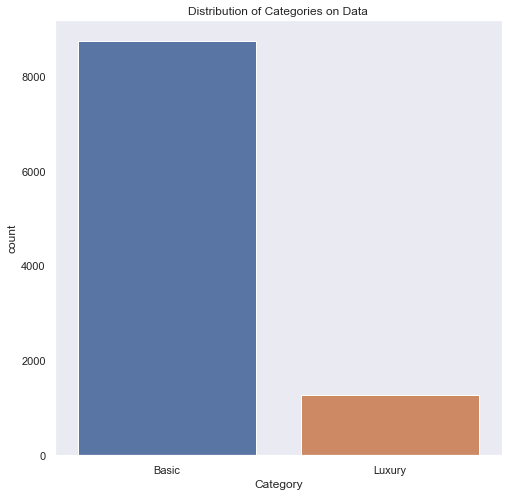

In [72]:
#Distribution of Category Variables
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(x = "Category", data=paris_df)
plt.title('Distribution of Categories on Data')
plt.grid(axis = "y")
plt.show()

There is a significant amount of "Basic" instances than "Luxury"

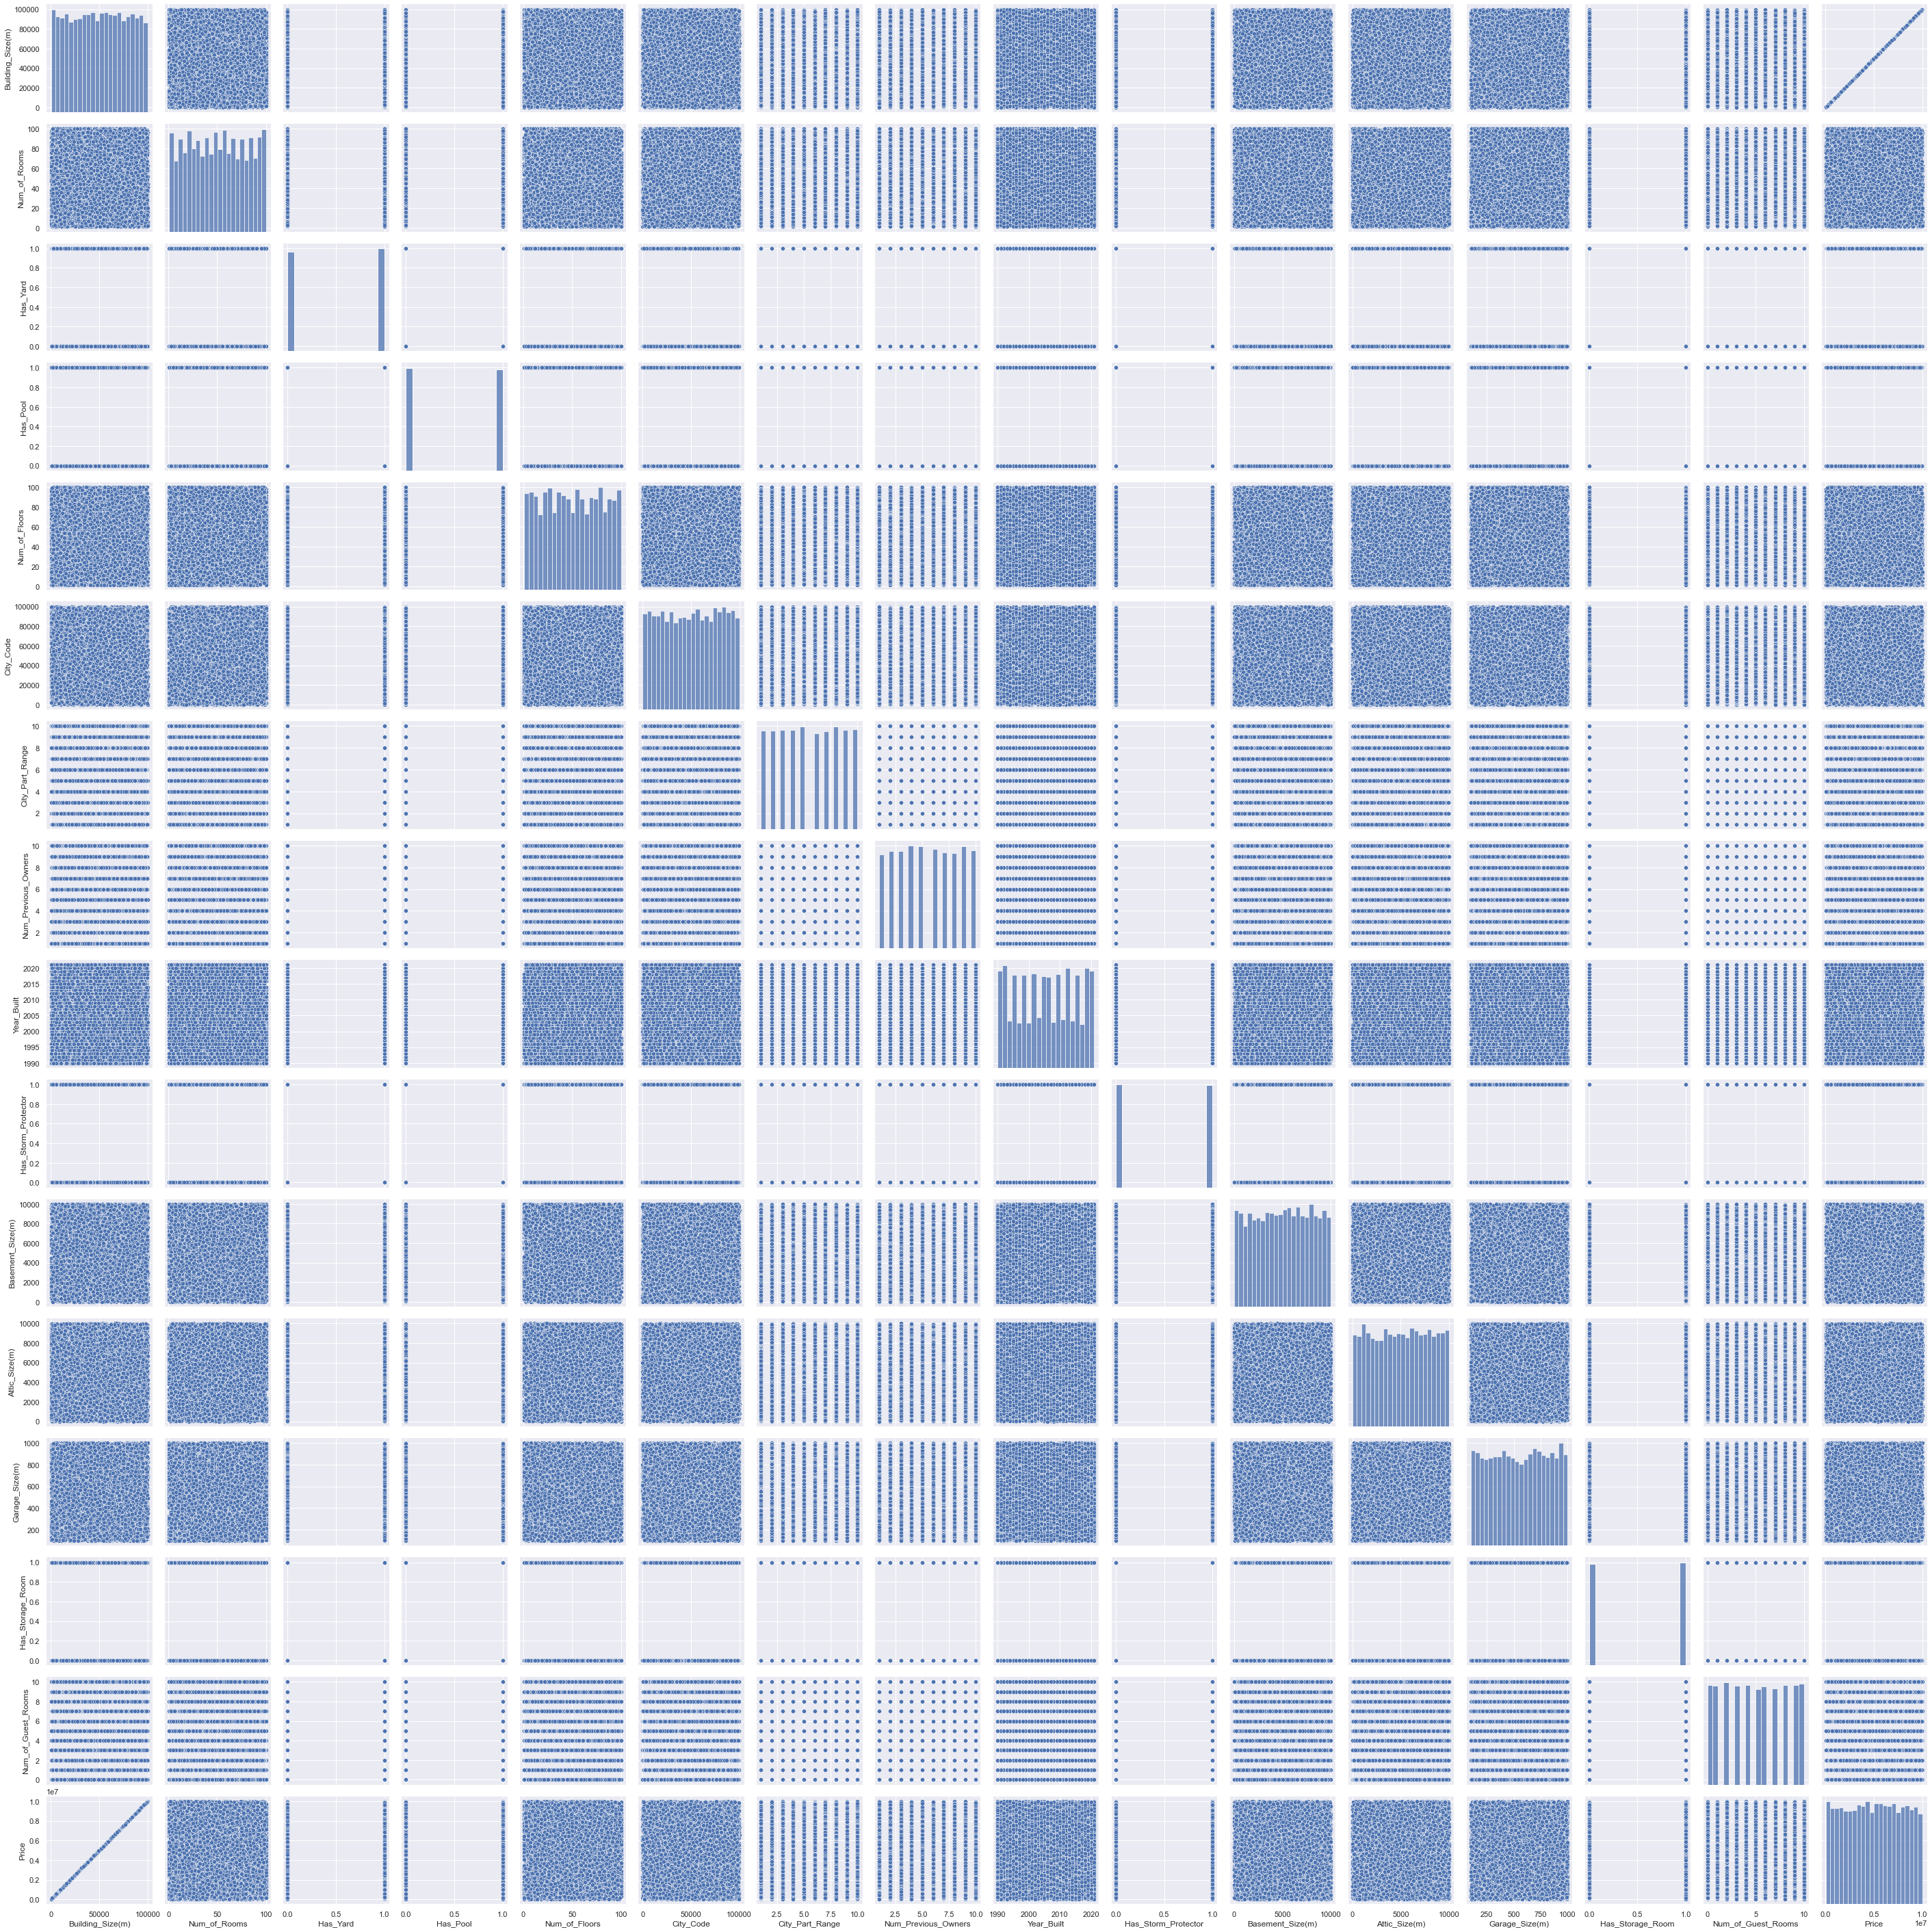

In [40]:
#Pair plot for quick view of the datasets distribution 
sns.set(rc={'figure.figsize':(20,15)})
sns.pairplot(paris_df)


In [11]:
#Are we removing any features for general importance?


In [41]:
#Print out correlation values in dataframe
#This is done with the "price" value in the dataset.
corr = paris_df.corr()
corr

Building_Size(m)  Num_of_Rooms  Has_Yard  Has_Pool  \
Building_Size(m)             1.000000      0.009573 -0.006650 -0.005594   
Num_of_Rooms                 0.009573      1.000000 -0.011240  0.017015   
Has_Yard                    -0.006650     -0.011240  1.000000  0.015514   
Has_Pool                    -0.005594      0.017015  0.015514  1.000000   
Num_of_Floors                0.001109      0.022244 -0.000883 -0.004006   
City_Code                   -0.001541      0.009040  0.006760  0.008072   
City_Part_Range              0.008758      0.008340  0.005023  0.014613   
Num_Previous_Owners          0.016619      0.016766  0.004279 -0.006848   
Year_Built                  -0.007207      0.003978  0.002214  0.001894   
Has_Storm_Protector          0.007480     -0.001656 -0.007598 -0.001001   
Basement_Size(m)            -0.003960     -0.013990 -0.008558 -0.007268   
Attic_Size(m)               -0.000588      0.012061 -0.003085 -0.011901   
Garage_Size(m)              -0.017246      0.023188 -0.004626  0.004832   
Has_Storage_Room            -0.003486     -0.004760 -0.009506  0.001238   
Num_of_Guest_Rooms          -0.000623     -0.015529 -0.007276  0.001123   
Price                        0.999999      0.009591 -0.006119 -0.005070   

                     Num_of_Floors  City_Code  City_Part_Range  \
Building_Size(m)          0.001109  -0.001541         0.008758   
Num_of_Rooms              0.022244   0.009040         0.008340   
Has_Yard                 -0.000883   0.006760         0.005023   
Has_Pool                 -0.004006   0.008072         0.014613   
Num_of_Floors             1.000000   0.002207        -0.004921   
City_Code                 0.002207   1.000000         0.011334   
City_Part_Range          -0.004921   0.011334         1.000000   
Num_Previous_Owners       0.002463  -0.007549         0.009238   
Year_Built                0.005022   0.009266         0.007748   
Has_Storm_Protector      -0.008566  -0.004941         0.005224   
Basement_Size(m)          0.006228   0.002652         0.004743   
Attic_Size(m)            -0.000270  -0.002019         0.010696   
Garage_Size(m)            0.011303  -0.002208        -0.001648   
Has_Storage_Room          0.003616   0.002554        -0.011338   
Num_of_Guest_Rooms       -0.021155  -0.003338        -0.007153   
Price                     0.001654  -0.001539         0.008813   

                     Num_Previous_Owners  Year_Built  Has_Storm_Protector  \
Building_Size(m)                0.016619   -0.007207             0.007480   
Num_of_Rooms                    0.016766    0.003978            -0.001656   
Has_Yard                        0.004279    0.002214            -0.007598   
Has_Pool                       -0.006848    0.001894            -0.001001   
Num_of_Floors                   0.002463    0.005022            -0.008566   
City_Code                      -0.007549    0.009266            -0.004941   
City_Part_Range                 0.009238    0.007748             0.005224   
Num_Previous_Owners             1.000000    0.006858             0.002522   
Year_Built                      0.006858    1.000000            -0.000645   
Has_Storm_Protector             0.002522   -0.000645             1.000000   
Basement_Size(m)               -0.000862   -0.005506            -0.005001   
Attic_Size(m)                   0.000719    0.013773            -0.003753   
Garage_Size(m)                  0.020268    0.005687             0.003758   
Has_Storage_Room                0.031707   -0.007868             0.001401   
Num_of_Guest_Rooms             -0.006082   -0.005431            -0.006549   
Price                           0.016619   -0.007210             0.007496   

                     Basement_Size(m)  Attic_Size(m)  Garage_Size(m)  \
Building_Size(m)            -0.003960      -0.000588       -0.017246   
Num_of_Rooms                -0.013990       0.012061        0.023188   
Has_Yard                    -0.008558      -0.003085       -0.004626   
Has_Pool                

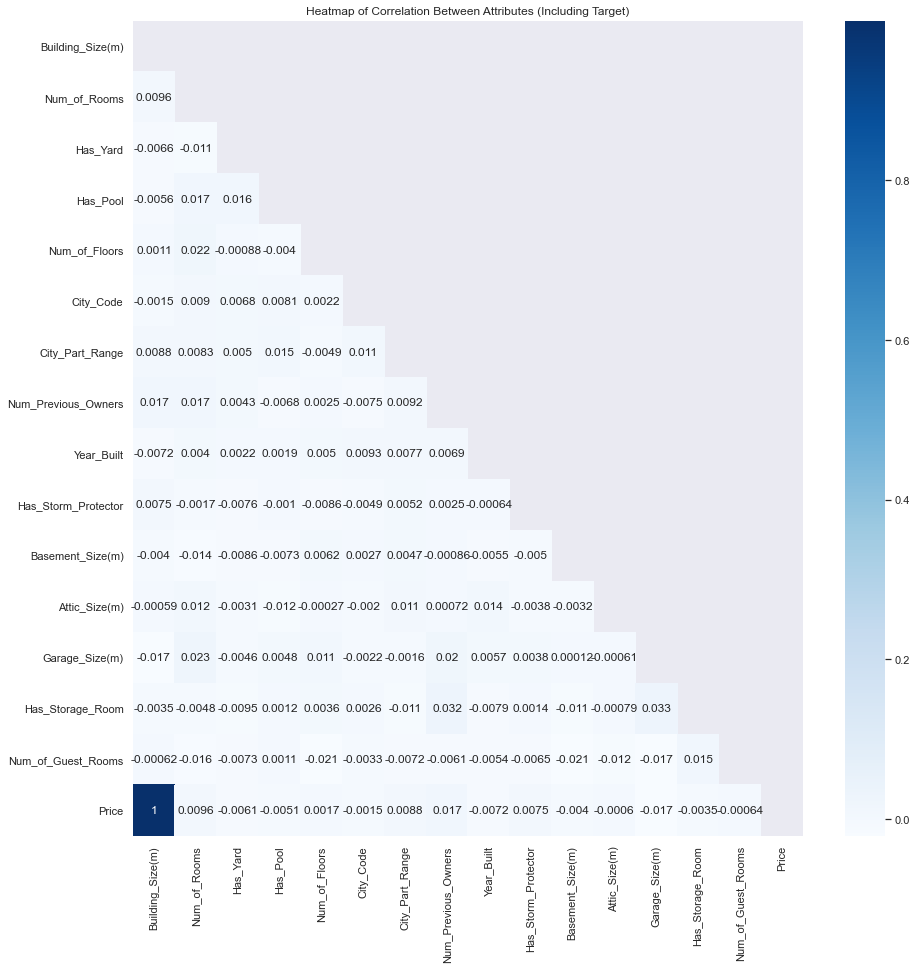

In [44]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(15,15),facecolor = "white")

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    #Color of the heatmap
    cmap="Blues",
    # Specifies that we want labels, not just colors
    annot=True,
    
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

plt.savefig("images/Int_Corr_2.png", dpi=99)

In [12]:
#Looking at values based on categories
#Looking at the binary values shows a few things.  Every Luxury home has: Pool, Newly Built,Has Yard and Has Pool
paris_df.groupby(["Category"]).mean()

Building_Size(m)  Num_of_Rooms  Has_Yard  Has_Pool  Num_of_Floors  \
Category                                                                      
Basic         49999.331883     50.363251   0.43755  0.423927      50.318374   
Luxury        48977.982609     50.324901   1.00000  1.000000      49.985771   

             City_Code  City_Part_Range  Num_Previous_Owners   Year_Built  \
Category                                                                    
Basic     50181.889410         5.513566             5.535661  2005.469376   
Luxury    50526.527273         5.486166             5.425296  2005.620553   

          Has_Storm_Protector  Basement_Size(m)  Attic_Size(m)  \
Category                                                         
Basic                0.499485       5045.484946    5034.319977   
Luxury               0.502767       4947.611067    4984.443478   

          Garage_Size(m)  Has_Storage_Room  Num_of_Guest_Rooms         Price  
Category                                                                      
Basic         553.342416          0.502576            4.990841  5.005929e+06  
Luxury        551.593676          0.505929            5.020553  4.907260e+06

- Every Luxury property Has a pool and Has a Yard. This will most likely be most significant features.
- The average price may not be a determining factor in if a property is Luxury. This is usually a big factor that takes into account the features. 

#### Other than the "Pool" and "Yard" feature, applying the mean on this data by category doesn't give explicit incite into what features will be significant in predicting the correct categy.

In [22]:
#Confusion Matrix - Think about loop through some of the categorixal numbers
#Create array with categorical numbers
pd.crosstab(paris_df["Category"],paris_df["Has_Pool"])

Has_Pool     0     1
Category            
Basic     5032  3703
Luxury       0  1265

In [45]:
pd.crosstab(paris_df["Category"],paris_df["Has_Yard"])

Has_Yard     0     1
Category            
Basic     4913  3822
Luxury       0  1265

In [79]:
pd.crosstab(paris_df["Category"],paris_df["Year_Built"])

Year_Built  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  \
Category                                                                ...   
Basic        272   282   327   267   268   248   280   260   282   254  ...   
Luxury        45    42    29    53    44    37    47    36    36    39  ...   

Year_Built  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
Category                                                                
Basic        270   314   274   268   261   248   292   274   285   264  
Luxury        35    38    38    37    46    40    42    47    51    40  

[2 rows x 32 columns]

<AxesSubplot:xlabel='Category', ylabel='Year_Built'>

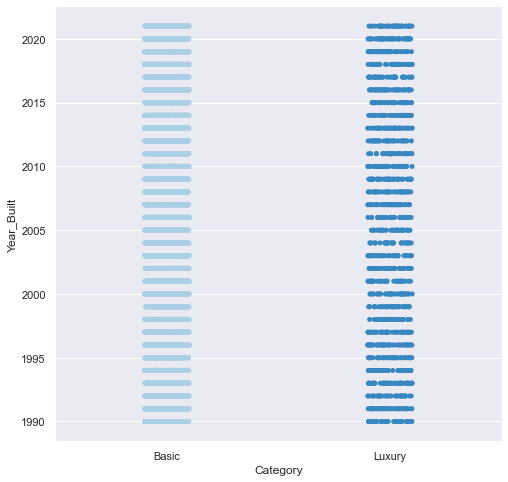

In [82]:
# Visualize averages of amount of water available by status group with barplot
fig, ax = plt.subplots(figsize=(8,8))
# Create barplot of status group and amount_tsh
sns.stripplot(x="Category", y='Year_Built', data=paris_df, palette="Blues")

<AxesSubplot:xlabel='Category', ylabel='Price'>

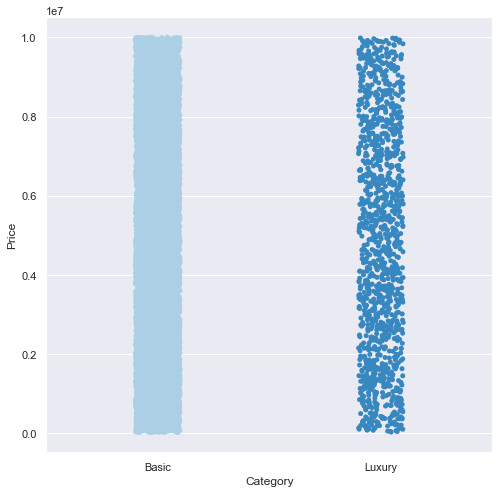

In [83]:
# Visualize averages of amount of water available by status group with barplot
fig, ax = plt.subplots(figsize=(8,8))
# Create barplot of status group and amount_tsh
sns.stripplot(x="Category", y='Price', data=paris_df, palette="Blues")

TypeError: 'module' object is not callable

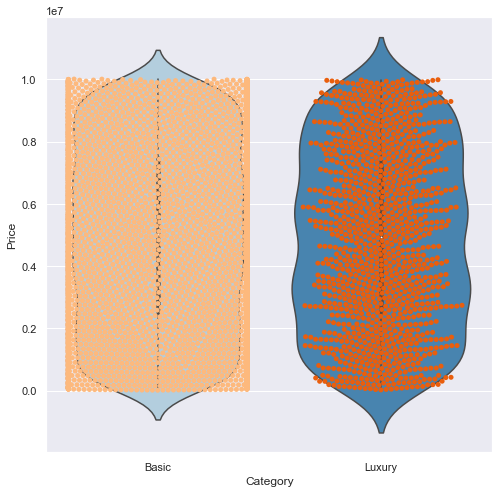

In [97]:
# Visualize averages of amount of water available by status group with barplot
fig, ax = plt.subplots(figsize=(8,8))
# Create barplot of status group and amount_tsh
sns.violinplot(x="Category", y='Price', data=paris_df, palette="Blues")
sns.swarmplot(x="Category", y='Price', data=paris_df, palette="Oranges")
sns.axisgrid()

<AxesSubplot:xlabel='Category', ylabel='Num_of_Rooms'>

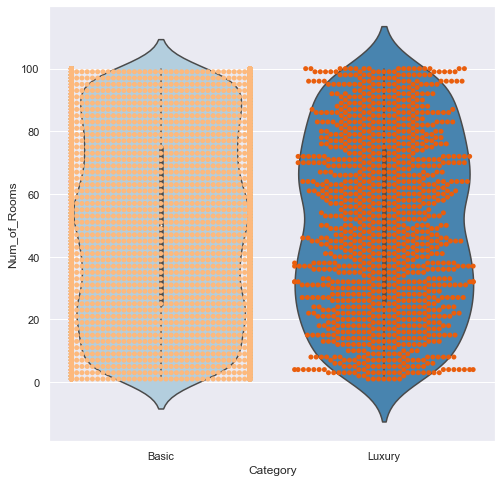

In [95]:
# Visualize averages of amount of water available by status group with barplot
fig, ax = plt.subplots(figsize=(8,8))
# Create barplot of status group and amount_tsh
sns.violinplot(x="Category", y='Num_of_Rooms', data=paris_df, palette="Blues")
sns.swarmplot(x="Category", y='Num_of_Rooms', data=paris_df, palette="Oranges")

<AxesSubplot:xlabel='Price', ylabel='Category'>

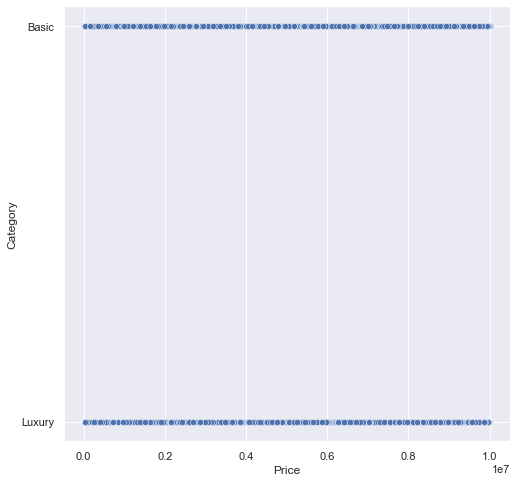

In [62]:
# Visualize averages of amount of water available by status group with barplot
fig, ax = plt.subplots(figsize=(8,8))
# Create barplot of status group and amount_tsh
sns.lineplot(x="Category", y='Num_of_Rooms', data=paris_df, palette="Blues")

# Data Preparation

## Link to EDA Refernce to use
https://www.kaggle.com/code/abdallahaboelkhair/paris-housing-eda-and-model-comparison

#Copy original dataframe
pdf = paris_df.copy()

In [ ]:
pdf.head()

In [ ]:
X = paris_df.drop("Category", axis = 1)
y = paris_df["Category"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

In [21]:
#Checking to see if the value counts are stratified for imbalance
print(y_test.value_counts())
print(y_train.value_counts())

NameError: name 'y_test' is not defined

# Modeling

## Model 1 - Dummy Classifier Model 

[Dummy Classifier- Abiheet Sahoo, 2020 ](https://towardsai.net/p/data-science/dealing-with-class-imbalance%E2%80%8A-%E2%80%8A-dummy-classifiers)

In [ ]:
dummy_paris_df = DummyClassifier(strategy="most_frequent")
dummy_paris_df.fit(X_train, y_train)


In [ ]:
cv_results = cross_val_score(dummy_paris_df, X_train, y_train, cv=5)
cv_results.mean()

In [ ]:
#Score of guessing Luxury
print("Percent of guess Luxury Accuracy= ", round(1-cv_results.mean(),2), "%")

In [ ]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Dummy Paris Model")
plot_confusion_matrix(dummy_paris_df, X_test, y_test, ax=ax, cmap="plasma");
#Increase the font size in the labels

In [ ]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Dummy Paris ROC Curve")
plot_roc_curve(dummy_paris_df, X_test, y_test, ax=ax)
#Increase the font size and labels

What does this tell me?

## Model 2.1 - Logistic Regression Model (Simple Model)

In [ ]:
#Function to predict from fitted model
def simple_model_predict(fit_model,X):
    
    y_pred = fit_model.predict(X)
    y_pred_prob = fit_model.predict_proba(X)
    return y_pred, y_pred_prob

In [ ]:
#Calculating precision, recall and f1
def precision_recall(y_true,y_pred,pos_label = "Luxury"):
    
    precision = precision_score(y_true, y_pred, pos_label=pos_label)
    recall = np.mean(recall_score(y_true, y_pred, pos_label=pos_label))
    f1 = f1_score(y_true, y_pred, pos_label=pos_label)
    
    print ("The Precision score is: {}".format(precision))
    print ("The Recall score is: {}".format(recall))
    print ("The F1 score is: {}".format(f1))
    print("\n")
    return precision, recall, f1

In [ ]:
def cross_matrix_val():
    #Get cross matrix values

In [ ]:
#Instantiate
lr_simple = LogisticRegression(random_state = 42,penalty= "none") 
#Fit training data
lr_simple.fit(X_train,y_train)
#Predict with Train
lr_y_train_pred,lr_y_train_pred_prob  = simple_model_predict(lr_simple,X_train)
#Predict with Train
lr_y_trest_pred,lr_y_test_pred_prob  = simple_model_predict(lr_simple,X_test)


In [ ]:
p,r,f = precision_recall(y_train, lr_y_train_pred,"Luxury")

In [ ]:
precision_recall(y_train, lr_y_train_pred,"Luxury")

#Precision, Recall and F1
#Train Score
precision_recall(X_train, y_train, "precision", "Luxury")
#Trest Score
precision_recall(lr_simple,X_test, y_test, "precision", "Luxury")

###  Model 2.1 - Logistic Regression Model (Simple Model) Evaluation

#### Training Data Evaluation

In [ ]:
### Train
scores = cross_val_score(lr_simple, X_train, y_train, cv=5 )
scores.mean()

In [ ]:
#Predict, Recall and F1
lr_simple

In [ ]:
#Printing out report with scores -
print(classification_report(y_train, lr_y_train_pred))

In [ ]:
#Speak to the ability to pick Precision of Basic and none for luxury...imbalanced data

In [ ]:
#Print out array confusion matrix
print(confusion_matrix(y_train, lr_y_train_pred, labels = ["Basic","Luxury"]))

In [ ]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Log Regression Simple Model")
plot_confusion_matrix(lr_simple, X_train, y_train, ax=ax, cmap="plasma");

#### Test Data Evaluation

In [ ]:
scores = cross_val_score(lr_simple, X_test, y_test, cv=5 )
scores.mean()

In [ ]:
#Printing out report with scores -
print(classification_report(y_test, lr_y_test_pred))

In [ ]:
#Print out array confusion matrix
print(confusion_matrix(y_test, lr_y_test_pred, labels = ["Basic","Luxury"]))

In [ ]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Log Regression Simple Model")
plot_confusion_matrix(lr_simple, X_test, y_test, ax=ax, cmap="plasma");

In [ ]:
# Precision decreased slightly with test data, but in the grand scheme of things still not good. Not able to correclty guess Luxury
#Basics was incorreclty guess

## Model 2.2 - Decision Tree Model (Simple Model)

In [ ]:
#Instantiate
dt_simple = DecisionTreeClassifier(random_state=42, criterion="entropy")
#Fit training data
dt_simple.fit(X_train,y_train)
#Predict with test
dt_y_train_pred = dt_simple.predict(X_train)
dt_y_test_pred = dt_simple.predict(X_test)
dt_y_test_prob = dt_simple.predict_proba(X_test)

#### Train  Data Evaluation

In [ ]:
scores = cross_val_score(dt_simple, X_train, y_train, cv=5 )
scores.mean()

In [ ]:
#Printing out report with scores -
print(classification_report(y_train, dt_y_train_pred))

In [ ]:
print(confusion_matrix(y_train, dt_y_train_pred, labels = ["Basic","Luxury"]))

In [ ]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Decision Tree Simple Model")
plot_confusion_matrix(dt_simple, X_train, y_train, ax=ax, cmap="plasma");

#### Test Data Evaluation

In [ ]:
scores = cross_val_score(dt_simple, X_test, y_test, cv=5 )
scores.mean()

In [ ]:
print(confusion_matrix(y_test, dt_y_test_pred, labels = ["Basic","Luxury"]))

In [ ]:
print(classification_report(y_test, dt_y_test_pred))

In [ ]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Decision Tree Simple Model")
plot_confusion_matrix(dt_simple, X_test, y_test, ax=ax, cmap="plasma");

[Explaination of Precsion/Recall Curve Use](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

In [ ]:
## Add the Precision/Recall Curve to the decison tree stuff
#probability of luxury scores only

dt_precision,dt_recall, _ = precision_recall_curve(y_test, dt_y_test_prob[:,1],pos_label=[ "Luxury"])
#dt_f1 = f1_score(y_test, dt_y_test_pred, pos_label=['Basic', 'Luxury']) 
dt_auc =  auc(dt_recall, dt_precision)
print("auc:", round(dt_auc,2))
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))            

In [ ]:
plt.plot(dt_recall, dt_precision, marker='.', label='Luxury')
#axis labels
plt.title("Decision Tree Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#Legend
plt.legend()

In [ ]:
## Optional, show visualization of tree

## Model 2.3 - Random Forest Model (Simple Model)

In [ ]:
#Instantiate
rf_simple = RandomForestClassifier(random_state = 42) 
#Fit training data
rf_simple.fit(X_train,y_train)
#Predict with test
rf_y_train_pred = rf_simple.predict(X_train)
rf_y_test_pred = rf_simple.predict(X_test)
rf_y_test_prob = rf_simple.predict_proba(X_test)

#### Train Data Evaluation

In [ ]:
scores = cross_val_score(rf_simple, X_train, y_train, cv=5 )
scores.mean()

In [ ]:
print(confusion_matrix(y_train, rf_y_train_pred, labels = ["Basic","Luxury"]))

In [ ]:
print(classification_report(y_train, rf_y_train_pred))

#### Test Data Evaluation

In [ ]:
scores = cross_val_score(rf_simple, X_test, y_test, cv=5 )
scores.mean()

In [ ]:
print(confusion_matrix(y_test, rf_y_test_pred, labels = ["Basic","Luxury"]))

In [ ]:
print(classification_report(y_test, rf_y_test_pred))

In [ ]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Random Forest Simple Model")
plot_confusion_matrix(rf_simple, X_test, y_test, ax=ax,normalize = "true", cmap="plasma");

In [ ]:
## Add the Precision/Recall Curve to the decison tree stuff
#probability of luxury scores only


rf_precision,rf_recall, _ = precision_recall_curve(y_test, rf_y_test_prob[:,1],pos_label=[ "Luxury"])
rf_auc =  auc(rf_recall, rf_precision)
print("auc:", round(rf_auc,2))


In [ ]:
rf_recall

In [ ]:
plt.plot(rf_recall, rf_precision, marker='.', label='Luxury')
#axis labels
plt.title("Random Forest Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#Legend
plt.legend()

## Model 2.4 - KNN Model (Simple Model) - Time Permitting

## Data Prep - SMOTE [Imbalance] and scale and Pipeline
[Logistric Regression Cumulative Lab](https://github.com/learn-co-curriculum/dsc-logistic-regression-lab/tree/solution)

#### Log Reg with smote non pipleline

In [ ]:
#Smote, Scaler Pipeline
#Fit Training
#Predict Training 
#Predict Test

#Score training
#Score Test
#Confusion Matrix
#Report
#Precision Recall Curve

In [ ]:
#{"AUC":"roc_auc", "Accuracy": "accuracy", "F1":"f1", "Precision":"precision", "Recall":"recall"}
precision_recall(y_test, y_test_pred,"Luxury")

In [ ]:
#Create a function, run loop for each type of classifier
#Log Regression, Decision Tree, Random Forest

#Create Pipeline for each classifier 
# create list of classifiers 
clf_dict = {"lgr":LogisticRegression(random_state=42), "dt":DecisionTreeClassifier(random_state=42), "rf":RandomForestClassifier(random_state=42)}
pipe_dict = {}
for name,clf in clf_dict.items():
    
    #Name of Classifier
    print("{} Classifier".format(clf))
    print('---' * 20)
    print("\n")
    
    
    #Create pipelines
    imb_pipe = ImPipeline(steps=[('ct', StandardScaler()),
                                 ('sm', SMOTE( random_state=42)),
                                 (name, clf)])
    
    print(imb_pipe)
    print("\n")
    
    #fitting the pipeline on the training data
    imb_pipe.fit(X_train, y_train)
    
    
    
    #Training Accuracy score
    print("Training Accuracy score:{0:0.2f}".format(imb_pipe.score(X_train, y_train)))
    
    #Testing Accuracy score
    print("Testing Accuracy score:{0:0.2f}".format(imb_pipe.score(X_test, y_test)))
    print("\n")
    
    #Creating a dictionary of the different pipelines
    pipe_dict[name] = imb_pipe
    
    #Predicting the new data
    y_test_pred = imb_pipe.predict(X_test)
    
    #Predicting the new data
    y_test_prob = imb_pipe.predict_proba(X_test)
    y_test_prob = y_test_prob[:,1]
    
    #Classification Report
    print("Classification Report:\n",classification_report(y_test, y_test_pred))
    print("\n")
    
    #Confusion Matrix
    cf_matrix = confusion_matrix(y_test, rf_y_test_pred, labels = ["Basic","Luxury"])
    print("Confusion Matrix: \n", cf_matrix)
    print("\n")
    

    #Plot Confusion Map Matrix
    fig = plt.figure(figsize = (6,6), facecolor = "white")
    fig.suptitle(" {} with SMOTE".format(clf))
    plot_confusion_matrix(imb_pipe, X_test, y_test, cmap="plasma")
    print("\n")
 
    #Plotting Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob, pos_label= "Luxury")
    
    fig= plt.figure(figsize = (6,6))
    plt.step(recall, precision, marker='.', label='Luxury')
    
    #axis labels
    plt.title("Precision-Recall Curve: {}".format(clf))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    
    #Legend
    plt.legend()
    print('---' * 20)
    print("\n")
    
    
   
   
        
    

In [ ]:
cus_rec = make_scorer(recall_score,pos_label="Luxury")
cus_prec = make_scorer(precision_score,pos_label="Luxury")
cus_f1 =  make_scorer(f1_score,pos_label="Luxury")
#cus_auc =  make_scorer()
cus_accur =  make_scorer(accuracy_score)
scoring = {"Precision":cus_prec,"Rec": cus_rec,"F1":cus_f1,"Accuracy":cus_accur}

In [ ]:
#Used to print out results form gridsearch

def gridsearch_score(grid_name):
    
    print("Best Estimator:", grid_name.best_estimator_)
    print("\n")
    print("Best Paremeters:", grid_name.best_params_) 
    print("\n")
    print("Best Precision Score:", grid_name.best_score_)
    print("\n") 

    #Getting prediction value
    gs_y_pred_train = grid_name.predict(X_train)
    #Getting prediction value
    gs_y_pred_test = grid_name.predict(X_test)
    
    
    #Checking our metrics to see how well our model performed
    print("Best Train Estimator Score:", grid_name.best_estimator_.score(X_train, gs_y_pred_train))
    print("Train Classification Report:\n", classification_report(y_train, gs_y_pred_train))
    print("\n")
    print("Best Train Estimator Score:", grid_name.best_estimator_.score(X_test, gs_y_pred_test))
    print("Test Classification Report:\n", classification_report(y_test, gs_y_pred_test))
    print('---' * 20)
    print("\n")
    

### LogisticRegression GridsearchCV

In [ ]:
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'lgr__penalty': ["none","l1"'l2', 'elasticnet'],
                      'lgr__solver': ["lbfgs", "liblinear", "saga"]}

gs_lgr = GridSearchCV(estimator= pipe_dict["lgr"], param_grid=parameters,
n_jobs= 3, refit = "Precision", scoring=scoring, return_train_score= True)

In [ ]:
gs_lgr.fit(X_train, y_train)


In [ ]:
gridsearch_score(gs_lgr)

### DecisionTree GridsearchCV

In [ ]:
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'dt__criterion': ["gini", "entropy"],
                      'dt__max_depth': [None, 5,100],
                      'dt__min_samples_split': [2,7,9],
                      'dt__min_samples_leaf': [2,5,7]}

gs_dt = GridSearchCV(estimator= pipe_dict["dt"], param_grid=parameters,
n_jobs= 3, refit = "Precision", scoring=scoring, return_train_score= True)



In [ ]:
gs_dt.fit(X_train, y_train)

In [ ]:
gridsearch_score(gs_dt)

### Random Forest GridsearchCV

In [ ]:
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'rf__n_estimators': [10,50,75],
                      'rf__criterion': ["gini", "entropy"],
                      'rf__max_depth': [None, 5,15,25,50],
                      'rf__min_samples_leaf': [2,5,7]}

gs_rf = GridSearchCV(estimator= pipe_dict["rf"], param_grid=parameters,
n_jobs= 3, refit = "Precision", scoring=scoring, return_train_score= True)

In [ ]:

gs_rf.fit(X_train, y_train)


In [ ]:
gridsearch_score(gs_rf)

## Choose Best Estimator

In [ ]:
#Confusion
 
#Graph best estimators confusion and map
#gRAPH THE pRECISION Recall curve

#Piuck best features
#TABLE AND GRAPH BEST features

#Filter features
#Run best features with estimator and compare scores
#Plot

#Eval
#Recommendations and Limitations *(Technical anD Business)

#EDA
#Business and DATA
#Format

    

In [ ]:
#Confusion Matrix
y_gs_rf_pred = gs_rf.best_estimator_.predict(X_test)
confusion_matrix(y_test,y_gs_rf_pred)

In [ ]:
gs_rf.best_estimator_

In [ ]:
#Map Confusion Matrix
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Random Forest Best Estimator")
plot_confusion_matrix(gs_rf.best_estimator_, X_test, y_test,ax=ax, normalize= "true", cmap="plasma");

In [ ]:
#Precision Recall on best estimator
y_gs_rf_prob = gs_rf.best_estimator_.predict_proba(X_test)
gs_rf_precision,gs_rf_recall, _ = precision_recall_curve(y_test, y_gs_rf_prob[:,1],pos_label=[ "Luxury"])
rf_auc =  auc(gs_rf_recall, gs_rf_precision)
print("auc:", round(rf_auc,2))


In [ ]:
#Get the precision and recall scores from the best estimator
fig= plt.plot(figsize = (15,15), facecolor = "white")
plt.plot(gs_rf_recall, gs_rf_precision, marker='.', label='Luxury')
#axis labels
plt.title("Random Forest Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#Legend
plt.legend()


## Feature Selection
[Joshua Code, Feature Engineering]

In [ ]:
#Get the best features from the best  model
#Then do the pipeline on it

#rf_clf = RandomForestClassifier(criterion='entropy', max_depth=5,min_samples_leaf=7, n_estimators=10,random_state=42)

best_model = gs_rf.best_estimator_
feat_importance = best_model.steps[2][1].feature_importances_

In [ ]:
columns = X_train.columns

In [ ]:
rf_imp_features  = pd.DataFrame({"Features": columns,"Importance_Level": feat_importance})
rf_imp_features = rf_imp_features.sort_values(by = "Importance_Level",axis = 0, ascending=False, ignore_index = True)
rf_imp_features

In [ ]:
#Plotting Importance from Best Model
sns.barplot(x = feat_importance, 
            y = columns, 
            data = rf_imp_features,
            color = 'tab:blue',
            order=rf_imp_features["Features"],
            orient = 'h')
sns.set(rc={'figure.figsize':(30,30)},font_scale= 2)
plt.title("Feature Importance of Best Mode",)
plt.xlabel('Feature Importance of Best Model')
plt.ylabel('Features')
plt.show()

#change size of labels

In [ ]:
# Choose top 5 Features

#Top 5 Features
rf_imp_features[0:5]


In [ ]:
"""Findings and Recommendations
In the previous two projects, the framing was primarily descriptive and inferential, meaning that you were trying to understand the distributions of variables and the relationship between them. For this project you can still use these techniques, but make sure you are also using a predictive approach.

A predictive finding might include:

How well your model is able to predict the target
What features are most important to your model
A predictive recommendation might include:

The contexts/situations where the predictions made by your model would and would not be useful for your stakeholder and business problem
Suggestions for how the business might modify certain input variables to achieve certain target results

"""

In [ ]:
gs_rf.best_index_

## 3rd Iteration - Choose best model to go on with [Grid/Random Searching ] Maybe Random Forest with pipeline

## Choose best features to do final mode with

# Evaluation

## Things to combe back and add

[Frequency dist of values in variables](https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#9.-Exploratory-data-analysis-) 
[Visualize Decision Tree]

In [ ]:
#Pick
filename = 'gridsearch__model.pkl'

In [ ]:
pickle.dump(rf_gs, open(filename, 'wb'))